In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/AirPassengers.csv')

df['Month'] = pd.to_datetime(df['Month'])

         Month  Passengers
0   1949-01-01         112
1   1949-02-01         118
2   1949-03-01         132
3   1949-04-01         129
4   1949-05-01         121
..         ...         ...
139 1960-08-01         606
140 1960-09-01         508
141 1960-10-01         461
142 1960-11-01         390
143 1960-12-01         432

[144 rows x 2 columns]


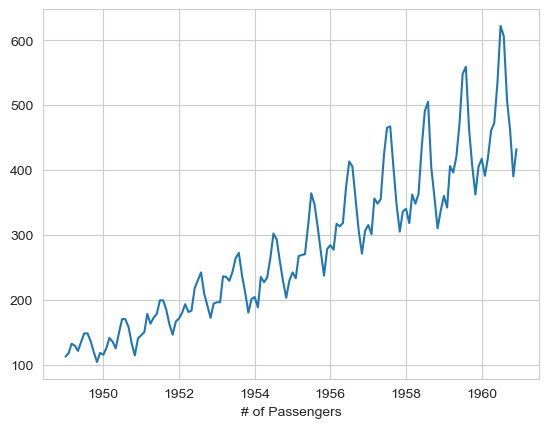

In [5]:
plt.plot(df['Month'], df['Passengers'])

plt.xlabel('Month')
plt.xlabel('# of Passengers')

print(df)
plt.show()

In [16]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Passengers'], seasonal_order=(2,1,1,12))
model_fit = model.fit()

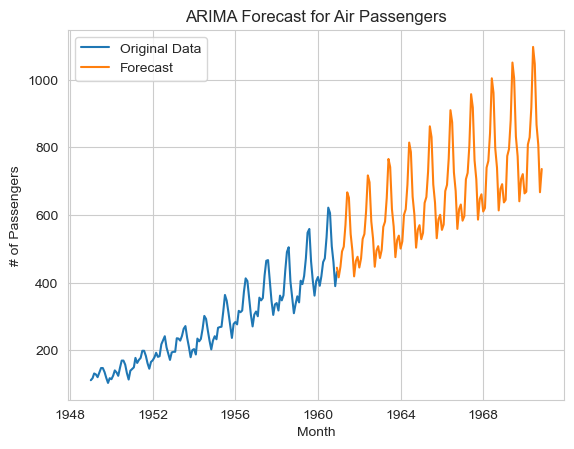

In [17]:
forecast = model_fit.forecast(steps=120)

date_range = pd.date_range(df['Month'].max(), periods=120, freq='MS')

# Plot the forecast along with the original data
plt.plot(df['Month'], df['Passengers'], label='Original Data')
plt.plot(date_range, forecast, label='Forecast')
plt.xlabel('Month')
plt.ylabel('# of Passengers')
plt.title('ARIMA Forecast for Air Passengers')
plt.legend()
plt.show()